In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score 

In [2]:
df = pd.read_excel(('Dataset2.xlsx'),sheet_name="Sheet2")
display(df)

,Year,Export Value,Poverty,Tax Income,Urban Population,"Agriculture, Forestry, Fishing",Exchange Rate to US$,GDP Growth
0,1960,NaN,NaN,NaN,14.586,NaN,NaN,NaN
1,1961,NaN,NaN,NaN,14.821,NaN,NaN,5.740646
2,1962,NaN,NaN,NaN,15.058,NaN,NaN,1.841978
3,1963,NaN,NaN,NaN,15.299,NaN,NaN,-2.237030
4,1964,NaN,NaN,NaN,15.543,NaN,NaN,3.529698
...,...,...,...,...,...,...,...,...
59,2019,NaN,4.4,1960633.60,55.985,12.712603,14130.583333,5.019288
60,2020,163191.8,3.8,1647783.34,56.641,13.698414,14625.250000,-2.065512
61,2021,231609.5,3.5,2011347.10,57.290,13.280217,14344.916667,3.703055
62,2022,291904.3,2.5,2436877.80,57.934,12.399659,14916.750000,5.308595


In [3]:
df = df.dropna()

In [4]:
X = df.drop("GDP Growth",axis=1)
y = df["GDP Growth"]
linear_regression = LinearRegression()
linear_regression.fit(X,y)

prediction = linear_regression.predict(X)

In [5]:
#r2 for y
def r2(y_true, y_hat):
    scikit_r2 = r2_score(y_true, y_hat)
    
    print(f"Scikit-Learn's R-squared = {scikit_r2}")

print('Positive R-squared\n')
r2(y, prediction)

print('\n\nNegative R-squared\n')
r2(y, np.zeros(len(y)))

Positive R-squared

Scikit-Learn's R-squared = 0.9854354504397438


Negative R-squared

Scikit-Learn's R-squared = -3.8402968023275355


In [6]:
#r2 for x
from sklearn.feature_selection import mutual_info_regression

mutual_info = mutual_info_regression(X, y, discrete_features=X.dtypes == np.int32)
mutual_info = pd.Series(mutual_info, index=X.columns)
mutual_info.sort_values(ascending=False, inplace=True)
mutual_info

Tax Income                        0.173214
Year                              0.152143
Urban Population                  0.139643
Poverty                           0.093452
Export Value                      0.004762
Exchange Rate to US$              0.003571
Agriculture, Forestry, Fishing    0.000000
dtype: float64

In [7]:
#r2 for x
result_df = pd.DataFrame()
for i in range(1, len(mutual_info) + 1):
    X_new = X.iloc[:, :i].copy()
    linear_regression = LinearRegression()
    linear_regression.fit(X_new, y)
    
    prediction = linear_regression.predict(X_new)
    r2 = r2_score(y_true=y, y_pred=prediction)
    adj_r2 = 1 - ((1 - r2) * (len(X) - 1) / (len(X) - i - 1))
    
    result_df = result_df.append(pd.DataFrame({'r2': r2,
                                              'adj_r2': adj_r2}, index=[i]))

result_df

C:\Users\Sean\AppData\Local\Temp\ipykernel_13460\3284735328.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append(pd.DataFrame({'r2': r2,
C:\Users\Sean\AppData\Local\Temp\ipykernel_13460\3284735328.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append(pd.DataFrame({'r2': r2,
C:\Users\Sean\AppData\Local\Temp\ipykernel_13460\3284735328.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append(pd.DataFrame({'r2': r2,
C:\Users\Sean\AppData\Local\Temp\ipykernel_13460\3284735328.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append(pd.D

,r2,adj_r2
1,0.272955,0.182074
2,0.662176,0.565655
3,0.680994,0.521491
4,0.834439,0.701990
5,0.922150,0.824837
6,0.983438,0.950315
7,0.985435,0.934460


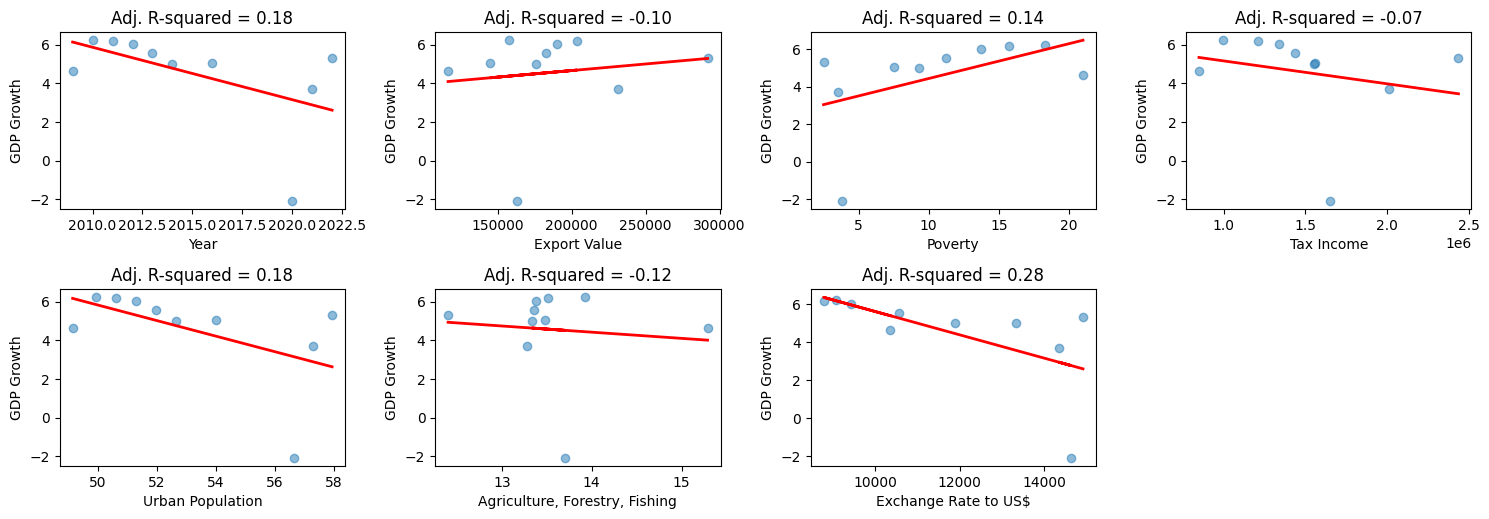

In [8]:
import matplotlib.pyplot as plt

def adjusted_r2(y_true, y_pred, n_samples, n_features):
    r_squared = r2_score(y_true, y_pred)
    adj_r_squared = 1 - (1 - r_squared) * ((n_samples - 1) / (n_samples - n_features - 1))
    return adj_r_squared

# Initialize a figure
plt.figure(figsize=(15, 10))

# Iterate through each feature column (excluding 'MEDV')
for i, col in enumerate(df.columns[:-1]):
    plt.subplot(4, 4, i + 1)
    
    # Scatter plot
    plt.scatter(df[col], df['GDP Growth'], alpha=0.5)
    
    # Fit a linear regression model
    X = df[[col]]
    y = df['GDP Growth']
    model = LinearRegression()
    model.fit(X, y)
    
    # Predictions
    y_pred = model.predict(X)
    
    # Calculate adjusted R-squared
    adj_r_squared = adjusted_r2(y, y_pred, len(y), 1)
    
    # Plot the regression line
    plt.plot(X, y_pred, color='red', linewidth=2)
    
    # Set labels and title
    plt.xlabel(col)
    plt.ylabel('GDP Growth')
    plt.title(f'Adj. R-squared = {adj_r_squared:.2f}')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()